In [1]:
!pip install nibabel
!pip install seaborn
!pip install openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution3D,Conv3D,Add,Concatenate, MaxPool3D,LeakyReLU,add, Convolution2D,BatchNormalization,AveragePooling3D, GlobalAveragePooling3D, ZeroPadding3D
from keras import backend as K
import cv2
import operator
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import SGD
import nibabel as nib
import pandas as pd
from scipy.ndimage import rotate
import random
import nibabel as nib
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import nibabel as nib
from matplotlib import animation, rc
from scipy.ndimage import rotate
import glob
import os
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split
from scipy.ndimage import zoom
from matplotlib.patches import PathPatch, Rectangle
from IPython.display import HTML
from tensorflow.keras import layers
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

E0000 00:00:1724997690.996738      13 common_lib.cc:815] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`=local.
=== Source Location Trace: ===
learning/45eac/tfrc/runtime/common_lib.cc:531


In [3]:
# Enable TPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Device:", tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Device: 
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2024-08-30 06:01:45.773316: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:01:45.773440: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:01:45.773517: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:01:45.773584: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:01:45.773649: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:01:45.773839: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:01:45.773918: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of accelerators:  8


lidc load

In [4]:
luna_df = pd.read_excel('/kaggle/input/spie-cropped-resampled-dataset/final_Luna16.xlsx')
column_luna = 'malignancy'
luna_series=luna_df['Series Uid'].tolist()

luna_folder = '/kaggle/input/spie-cropped-resampled-dataset/Luna_16_cropped_resampled/Luna_16_cropped_resampled'  
luna = []
for i in luna_series:
    nii_file_path = os.path.join(luna_folder, f'{i}.nii')  # Assuming NII files have the extension '.nii'
    
    if os.path.exists(nii_file_path):
        luna.append(i)
luna=np.array(luna)

print(luna.shape)





# Specify the path to the Excel file
file_path = '/kaggle/input/semi-testtrainval/test_initialtrain_vai_set.xlsx'
df = pd.read_excel(file_path)

z_train = df.iloc[:, 2]  

z_test_fixed = df.iloc[:, 0]  
nan_count = z_test_fixed.isna().sum()
z_test = z_test_fixed.dropna()

z_val_fixed = df.iloc[:, 1]  
nan_count_val = z_val_fixed.isna().sum()
z_val = z_val_fixed.dropna()


(557,)


function for rotation

In [5]:
BS= 68 # batch size
E = 200 #epoch

In [6]:
def aug_rotate(x):

    rotated_slices = []
    for slice_idx in range(x.shape[2]):
        slice_data = x[:, :, slice_idx]  # Extract a single slice
        rotated_slice = rotate(slice_data, angle=angles[j], reshape=False, mode='nearest')
        rotated_slices.append(rotated_slice)

    # Create a new NIfTI image from the rotated slices
    rotated_img_data = np.stack(rotated_slices, axis=-1)
    # Create a new NIfTI image using the header information from the original image
    rotated_nifti = nib.Nifti1Image(rotated_img_data, img.affine)
    
    return rotated_nifti

split

In [7]:
angles = [0, 45, 90, 135, 180, 225, 270, 315]



datas_test = []
labels_test = []
scans_test = []

datas_train = []
labels_train = []
scans_train = []

datas_val = []
labels_val = []
scans_val = []


for i in z_train:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join(luna_folder, f"{i}.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        for j in range(len(angles)):
            rotated_nifti = aug_rotate(data)
            datas_train.append(rotated_nifti.get_fdata())
            labels_train.append(lab)
                    
for i in z_val:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join(luna_folder, f"{i}.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_val.append(data)
        labels_val.append(lab)

for i in z_test:
    lab = luna_df.loc[luna_df['Series Uid'] == i, 'malignancy'].values[0]
    img_files = glob.glob(os.path.join(luna_folder, f"{i}.nii"))
    for img_file in img_files:
        img = nib.load(img_file)
        data = img.get_fdata()
        datas_test.append(data)
        labels_test.append(lab)
            
X_train = np.array(datas_train)
y_train = np.array(labels_train)
X_test = np.array(datas_test)
y_test = np.array(labels_test)
X_val = np.array(datas_val)
y_val = np.array(labels_val)


X_train = np.array(datas_train)
y_train = np.array(labels_train)
X_test = np.array(datas_test)
y_test = np.array(labels_test)
X_val = np.array(datas_val)
y_val = np.array(labels_val)

print(z_train.shape, z_test.shape, z_val.shape)
print(X_train.shape, X_test.shape, X_val.shape)

(356,) (112,) (89,)
(2848, 32, 32, 32) (112, 32, 32, 32) (89, 32, 32, 32)


model train

### train with 3D CNN

In [8]:
def tdCNN(width=32, height=32, depth=32):
    inputs = tf.keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=32, kernel_size=3, activation="relu", padding="same")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu", padding="same")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu", padding="same")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu", padding="same")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu", padding="same")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.4)(x)

    outputs = layers.Dense(units=1, activation="sigmoid")(x)

    model = tf.keras.Model(inputs, outputs, name="3dcnn")
    return model


2024-08-30 06:02:30.578859: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:02:30.578988: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:02:34.069069: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:02:34.086352: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:02:34.103623: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:02:34.121728: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-08-30 06:02:34.155491: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

4/4 [==============================] - 1s 107ms/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.87037   0.82456   0.84685        57
   malignant    0.82759   0.87273   0.84956        55

    accuracy                        0.84821       112
   macro avg    0.84898   0.84864   0.84820       112
weighted avg    0.84936   0.84821   0.84818       112

AUC: 0.9307814992025518


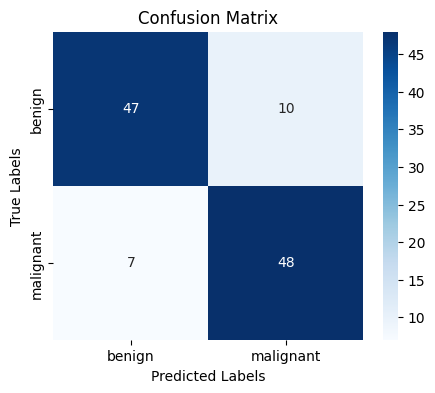

Accuracy: 84.82142686843872
loss: 34.94768440723419


In [9]:
with strategy.scope():
    model=tdCNN()
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('3DCNN.h5', monitor='val_accuracy',save_best_only=True)

BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync
# Fit data to model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=E, batch_size=BATCH_SIZE_TPU,callbacks=[lr_callback,checkpoint_callback],verbose=0)


# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model1 = tf.keras.models.load_model('3DCNN.h5')

loss1, accuracy1 = best_model1.evaluate(X_test, y_test)   


#----------------------------------------------------------------
predictions1 = best_model1.predict(X_test)
predicted_classes = (predictions1 > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes , target_names=class_names,digits=5)
print("Classification Report:\n", report)
auc1 = roc_auc_score(y_test, predictions1)
print(f'AUC: {auc1}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
#----------------------------------------------------------------

print(f'Accuracy: {accuracy1*100}')
print(f'loss: {loss1*100}')




### train with renet

In [10]:
from tensorflow.keras.layers import Input, MaxPooling3D, Add, AveragePooling3D
def resnet_block(x, filters, num_blocks):
    
    if filters!=64:
        shortcut = Conv3D(filters, (1, 1,1), strides=(1, 1,1), padding='same',activation='relu')(x)
        x = Conv3D(filters,(3,3,3), padding='same',activation='relu')(x)
        x = Conv3D(filters,(3,3,3), padding='same',activation='relu')(x)
        x = BatchNormalization()(x)
        x=Add()([x, shortcut])
        num_blocks=num_blocks-1
    
    for i in range(num_blocks):
        input=x
        x = Conv3D(filters,(3,3,3), padding='same',activation='relu')(x)
        x = Conv3D(filters,(3,3,3), padding='same',activation='relu')(x)
        x = BatchNormalization()(x)
        x=Add()([x, input])
    
    return x


def resnet_34(input_shape=(32,32,32,1)):
    
    inputs = Input(shape=input_shape)
    filters = [64, 128, 256, 512]
    block_sizes = [3, 4, 6, 5]

    
    # Initial convolutional layer
    
    x = Conv3D(64, (7, 7,7), strides=(2, 2,2),padding='same',activation='relu')(inputs)
    x = MaxPooling3D(pool_size=(3, 3,3), strides=(2, 2,2), padding='same')(x)

    for i, num_blocks in enumerate(block_sizes):
        x = resnet_block(x, filters[i], num_blocks)
    

    x = AveragePooling3D(pool_size=(2, 2, 2))(x)
    x = Flatten()(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model


model = resnet_34()

2024-08-30 06:06:40.676233: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.
2024-08-30 06:08:01.543730: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 5s 1s/step
Classification Report:
               precision    recall  f1-score   support

      benign    0.86538   0.78947   0.82569        57
   malignant    0.80000   0.87273   0.83478        55

    accuracy                        0.83036       112
   macro avg    0.83269   0.83110   0.83024       112
weighted avg    0.83328   0.83036   0.83015       112

AUC: 0.8956937799043062


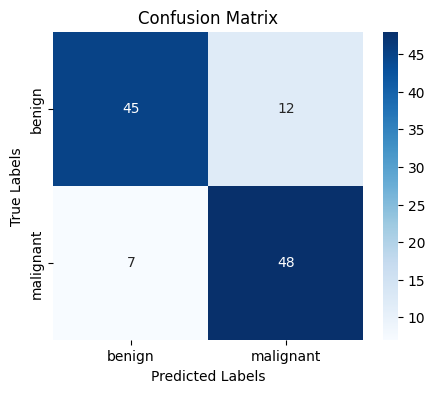

Accuracy: 83.03571343421936
loss: 42.57740676403046


In [11]:
with strategy.scope():

    model=resnet_34(input_shape=(32,32,32,1))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.001,
        patience=5,
        min_lr=1e-6)

# Define the early stopping callback to stop training if validation loss does not improve

checkpoint_callback = ModelCheckpoint('resnet.h5', monitor='val_accuracy',save_best_only=True)
BATCH_SIZE_TPU = BS * strategy.num_replicas_in_sync

# Fit data to model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=E, batch_size=BATCH_SIZE_TPU,
                    callbacks=[checkpoint_callback,lr_callback],verbose=0)
    

# Evaluate the model - report accuracy and capture it into a list for future reporting
best_model = tf.keras.models.load_model('resnet.h5')
loss2, accuracy2 = best_model.evaluate(X_test, y_test)


#----------------------------------------------------------------
predictions2 = best_model.predict(X_test)
predicted_classes = (predictions2 > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes , target_names=class_names,digits=5)
print("Classification Report:\n", report)
auc2 = roc_auc_score(y_test, predictions2)
print(f'AUC: {auc2}')


# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
#----------------------------------------------------------------



print(f'Accuracy: {accuracy2*100}')
print(f'loss: {loss2*100}')

### train with LCCNet

In [12]:
def lcc():
    model = Sequential()
    model.add(Conv3D(32,(3,3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(32,32,32,1)))
    model.add(BatchNormalization())
    model.add(Conv3D(32, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    #model.add(Dropout(0.1))
    
    model.add(Conv3D(64, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(64, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    #model.add(Dropout(0.2))
    
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(128, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool3D((2, 2,2)))

    model.add(Conv3D(256, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv3D(256, (3, 3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    #model.add(MaxPool3D((2, 2,2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))


    model.add(Dense(1, activation='sigmoid', kernel_initializer='he_uniform'));
    return model

4/4 [==============================] - 1s 197ms/step
Classification Report:
               precision    recall  f1-score   support

      benign       0.96      0.79      0.87        57
   malignant       0.82      0.96      0.88        55

    accuracy                           0.88       112
   macro avg       0.89      0.88      0.87       112
weighted avg       0.89      0.88      0.87       112

AUC: 0.9473684210526316


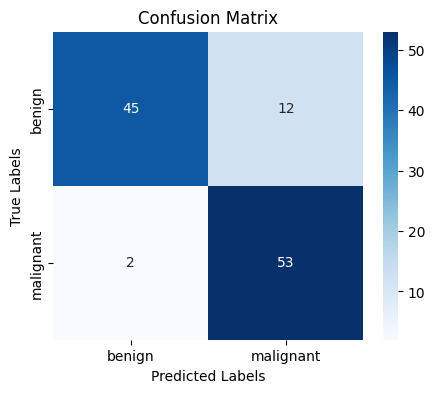

Accuracy: 87.5
loss: 35.7098251581192


In [13]:
best_model = tf.keras.models.load_model('/kaggle/input/semi-testtrainval/semiSupervised_HU1.h5')
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
loss3, accuracy3 = best_model.evaluate(X_test, y_test)


#----------------------------------------------------------------
predictions3 = best_model.predict(X_test)
predicted_classes = (predictions3 > 0.5).astype(int)

# Generate the classification report
class_names = list(['benign','malignant'])
report = classification_report(y_test, predicted_classes , target_names=class_names)
print("Classification Report:\n", report)
auc3 = roc_auc_score(y_test, predictions3)
print(f'AUC: {auc3}')


# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
#----------------------------------------------------------------

print(f'Accuracy: {accuracy3*100}')
print(f'loss: {loss3*100}')

In [14]:
print("Accuracy")
print(f'model1(3D CNN)  : {accuracy1*100}')
print(f'model2(RESNET34): {accuracy2*100}')
print(f'model3(LCC-Net) : {accuracy3*100}')

print("------------------------------")
print("Loss")
print(f'model1(3D CNN)  : {loss1*100}')
print(f'model2(RESNET34): {loss2*100}')
print(f'model3(LCC-Net) : {loss3*100}')

print("------------------------------")
print("AUC")
print(f'model1(3D CNN)  : {auc1*100}')
print(f'model2(RESNET34): {auc2*100}')
print(f'model3(LCC-Net) : {auc3*100}')

Accuracy
model1(3D CNN)  : 84.82142686843872
model2(RESNET34): 83.03571343421936
model3(LCC-Net) : 87.5
------------------------------
Loss
model1(3D CNN)  : 34.94768440723419
model2(RESNET34): 42.57740676403046
model3(LCC-Net) : 35.7098251581192
------------------------------
AUC
model1(3D CNN)  : 93.07814992025519
model2(RESNET34): 89.56937799043062
model3(LCC-Net) : 94.73684210526316


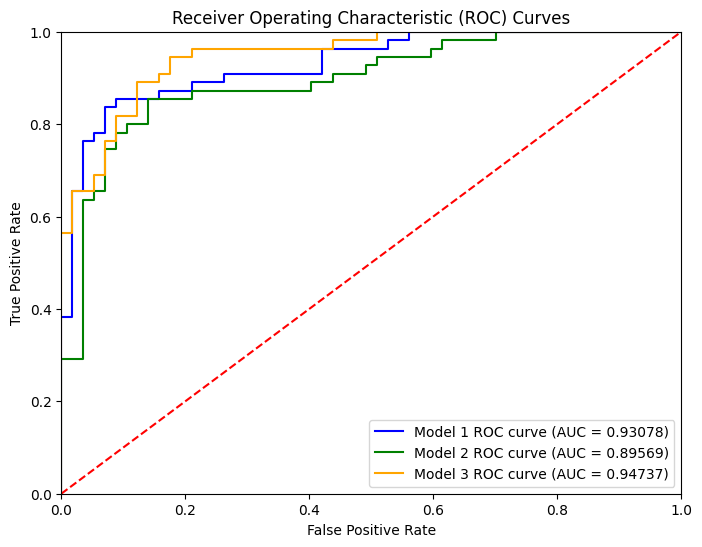

In [15]:
fpr1, tpr1, _ = roc_curve(y_test, predictions1)
fpr2, tpr2, _ = roc_curve(y_test, predictions2)
fpr3, tpr3, _ = roc_curve(y_test, predictions3)


# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', label=f'Model 1 ROC curve (AUC = {auc1:.5f})')
plt.plot(fpr2, tpr2, color='green', label=f'Model 2 ROC curve (AUC = {auc2:.5f})')
plt.plot(fpr3, tpr3, color='orange', label=f'Model 3 ROC curve (AUC = {auc3:.5f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

Plotted unique z_test values:
1.3.6.1.4.1.14519.5.2.1.6279.6001.202283133206014258077705539227_291
1.3.6.1.4.1.14519.5.2.1.6279.6001.503980049263254396021509831276_65
1.3.6.1.4.1.14519.5.2.1.6279.6001.631047517458234322522264161877_949
1.3.6.1.4.1.14519.5.2.1.6279.6001.244204120220889433826451158706_259
1.3.6.1.4.1.14519.5.2.1.6279.6001.300146276266881736689307479986_1014
1.3.6.1.4.1.14519.5.2.1.6279.6001.197063290812663596858124411210_302
1.3.6.1.4.1.14519.5.2.1.6279.6001.226889213794065160713547677129_712
1.3.6.1.4.1.14519.5.2.1.6279.6001.192256506776434538421891524301_929
1.3.6.1.4.1.14519.5.2.1.6279.6001.194488534645348916700259325236_1009
1.3.6.1.4.1.14519.5.2.1.6279.6001.299806338046301317870803017534_1049
1.3.6.1.4.1.14519.5.2.1.6279.6001.185154482385982570363528682299_191
1.3.6.1.4.1.14519.5.2.1.6279.6001.129982010889624423230394257528_187
1.3.6.1.4.1.14519.5.2.1.6279.6001.826812708000318290301835871780_496
1.3.6.1.4.1.14519.5.2.1.6279.6001.224465398054769500989828256685_754
1.

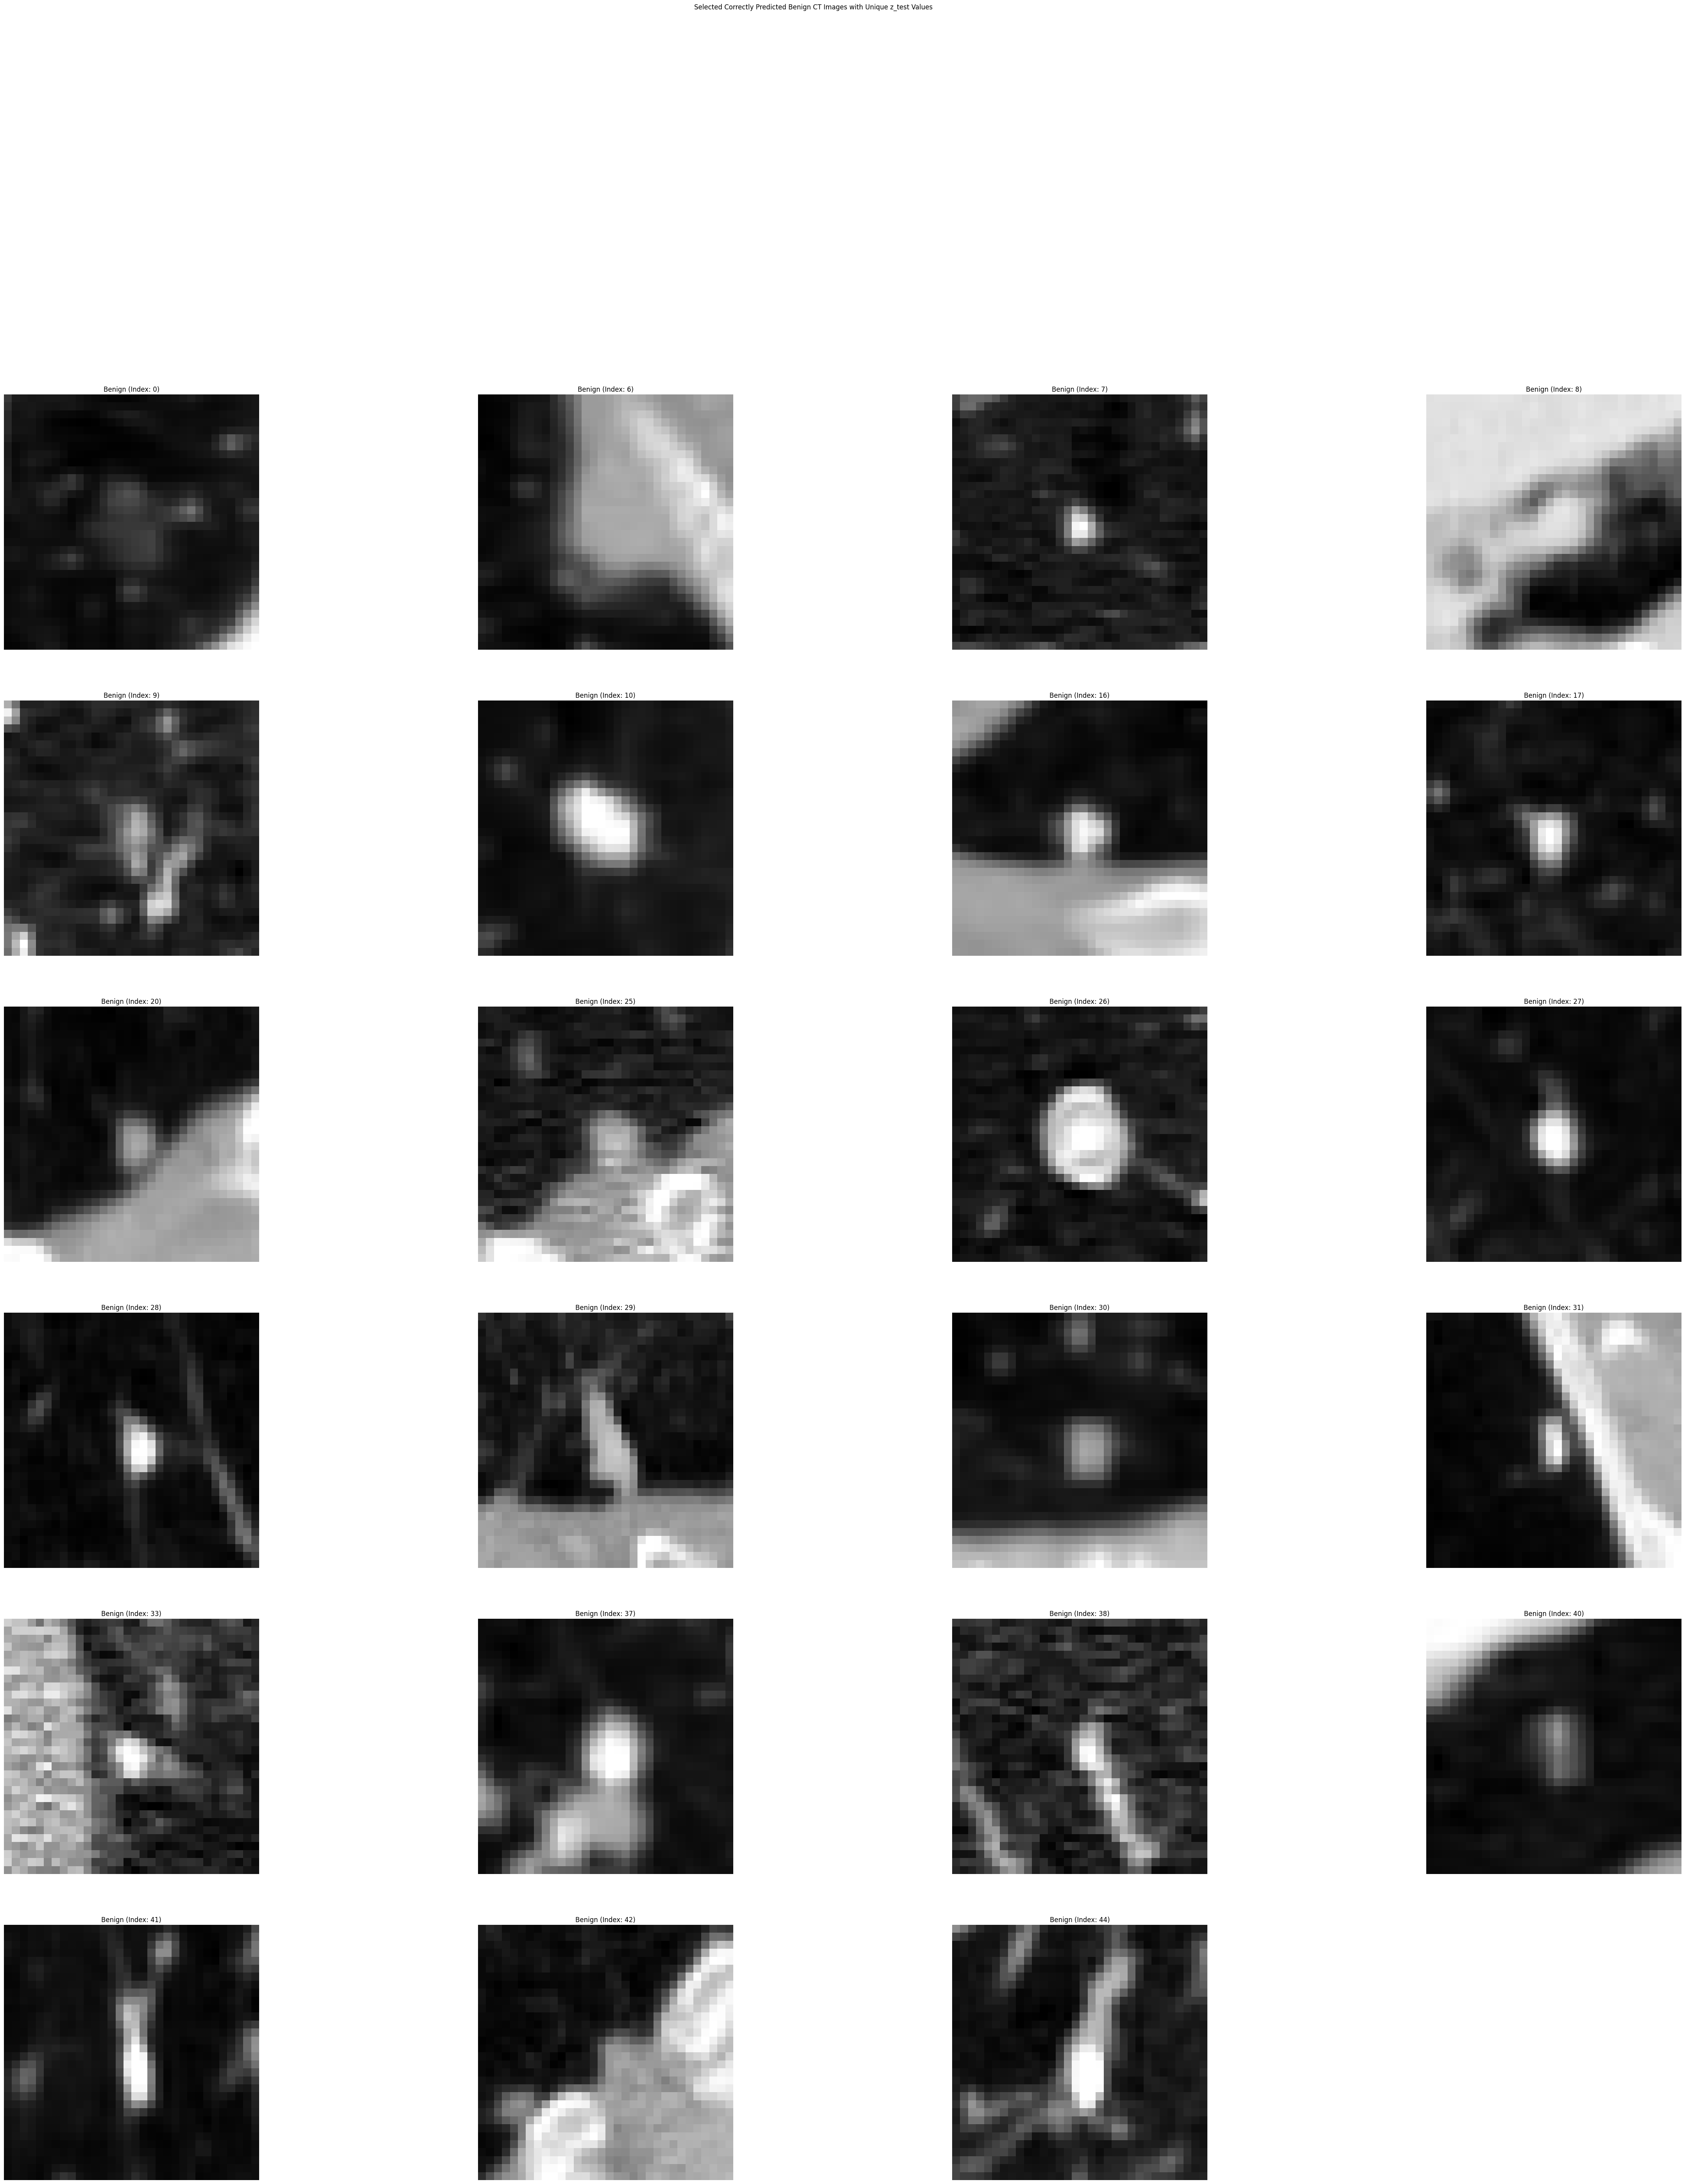

In [16]:
# Assuming correct_benign_indices contains all the correct benign predictions
correct_indices = np.where(predicted_classes == y_test)[0]
correct_benign_indices = [i for i in correct_indices if y_test[i] == 0]

selected_indices = []
unique_z_test_values = set()
for i in range(40):
    index = 15 + i * 32
    if index < len(correct_benign_indices):  # Ensure we don't go out of bounds
        z_value = z_test[correct_benign_indices[index]]
        if z_value not in unique_z_test_values:  # Check if the z_test value is unique
            selected_indices.append(correct_benign_indices[index])
            unique_z_test_values.add(z_value)

# Print the corresponding z_test values
print("Plotted unique z_test values:")
for idx in selected_indices:
    print(z_test[idx])

# Plotting the selected benign CT images
plt.figure(figsize=(60, 100))
for i, idx in enumerate(selected_indices):
    plt.subplot(10, 4, i + 1)  
    plt.imshow(X_test[idx].reshape(32, 32, 32)[16], cmap='gray')  # Adjusted to slice 16
    plt.title(f'Benign (Index: {idx})')
    plt.axis('off')

plt.suptitle('Selected Correctly Predicted Benign CT Images with Unique z_test Values')
plt.show()


Plotted unique z_test values:
1.3.6.1.4.1.14519.5.2.1.6279.6001.200725988589959521302320481687_1029
1.3.6.1.4.1.14519.5.2.1.6279.6001.321935195060268166151738328001_388
1.3.6.1.4.1.14519.5.2.1.6279.6001.245248446973732759194067808002_744
1.3.6.1.4.1.14519.5.2.1.6279.6001.222052723822248889877676736332_1003
1.3.6.1.4.1.14519.5.2.1.6279.6001.202811684116768680758082619196_186
1.3.6.1.4.1.14519.5.2.1.6279.6001.265453131727473342790950829556_912
1.3.6.1.4.1.14519.5.2.1.6279.6001.765930210026773090100532964804_1063
1.3.6.1.4.1.14519.5.2.1.6279.6001.188619674701053082195613114069_774
1.3.6.1.4.1.14519.5.2.1.6279.6001.187108608022306504546286626125_129
1.3.6.1.4.1.14519.5.2.1.6279.6001.123697637451437522065941162930_453
1.3.6.1.4.1.14519.5.2.1.6279.6001.463214953282361219537913355115_112
1.3.6.1.4.1.14519.5.2.1.6279.6001.280072876841890439628529365478_922
1.3.6.1.4.1.14519.5.2.1.6279.6001.892375496445736188832556446335_1059
1.3.6.1.4.1.14519.5.2.1.6279.6001.173106154739244262091404659845_362


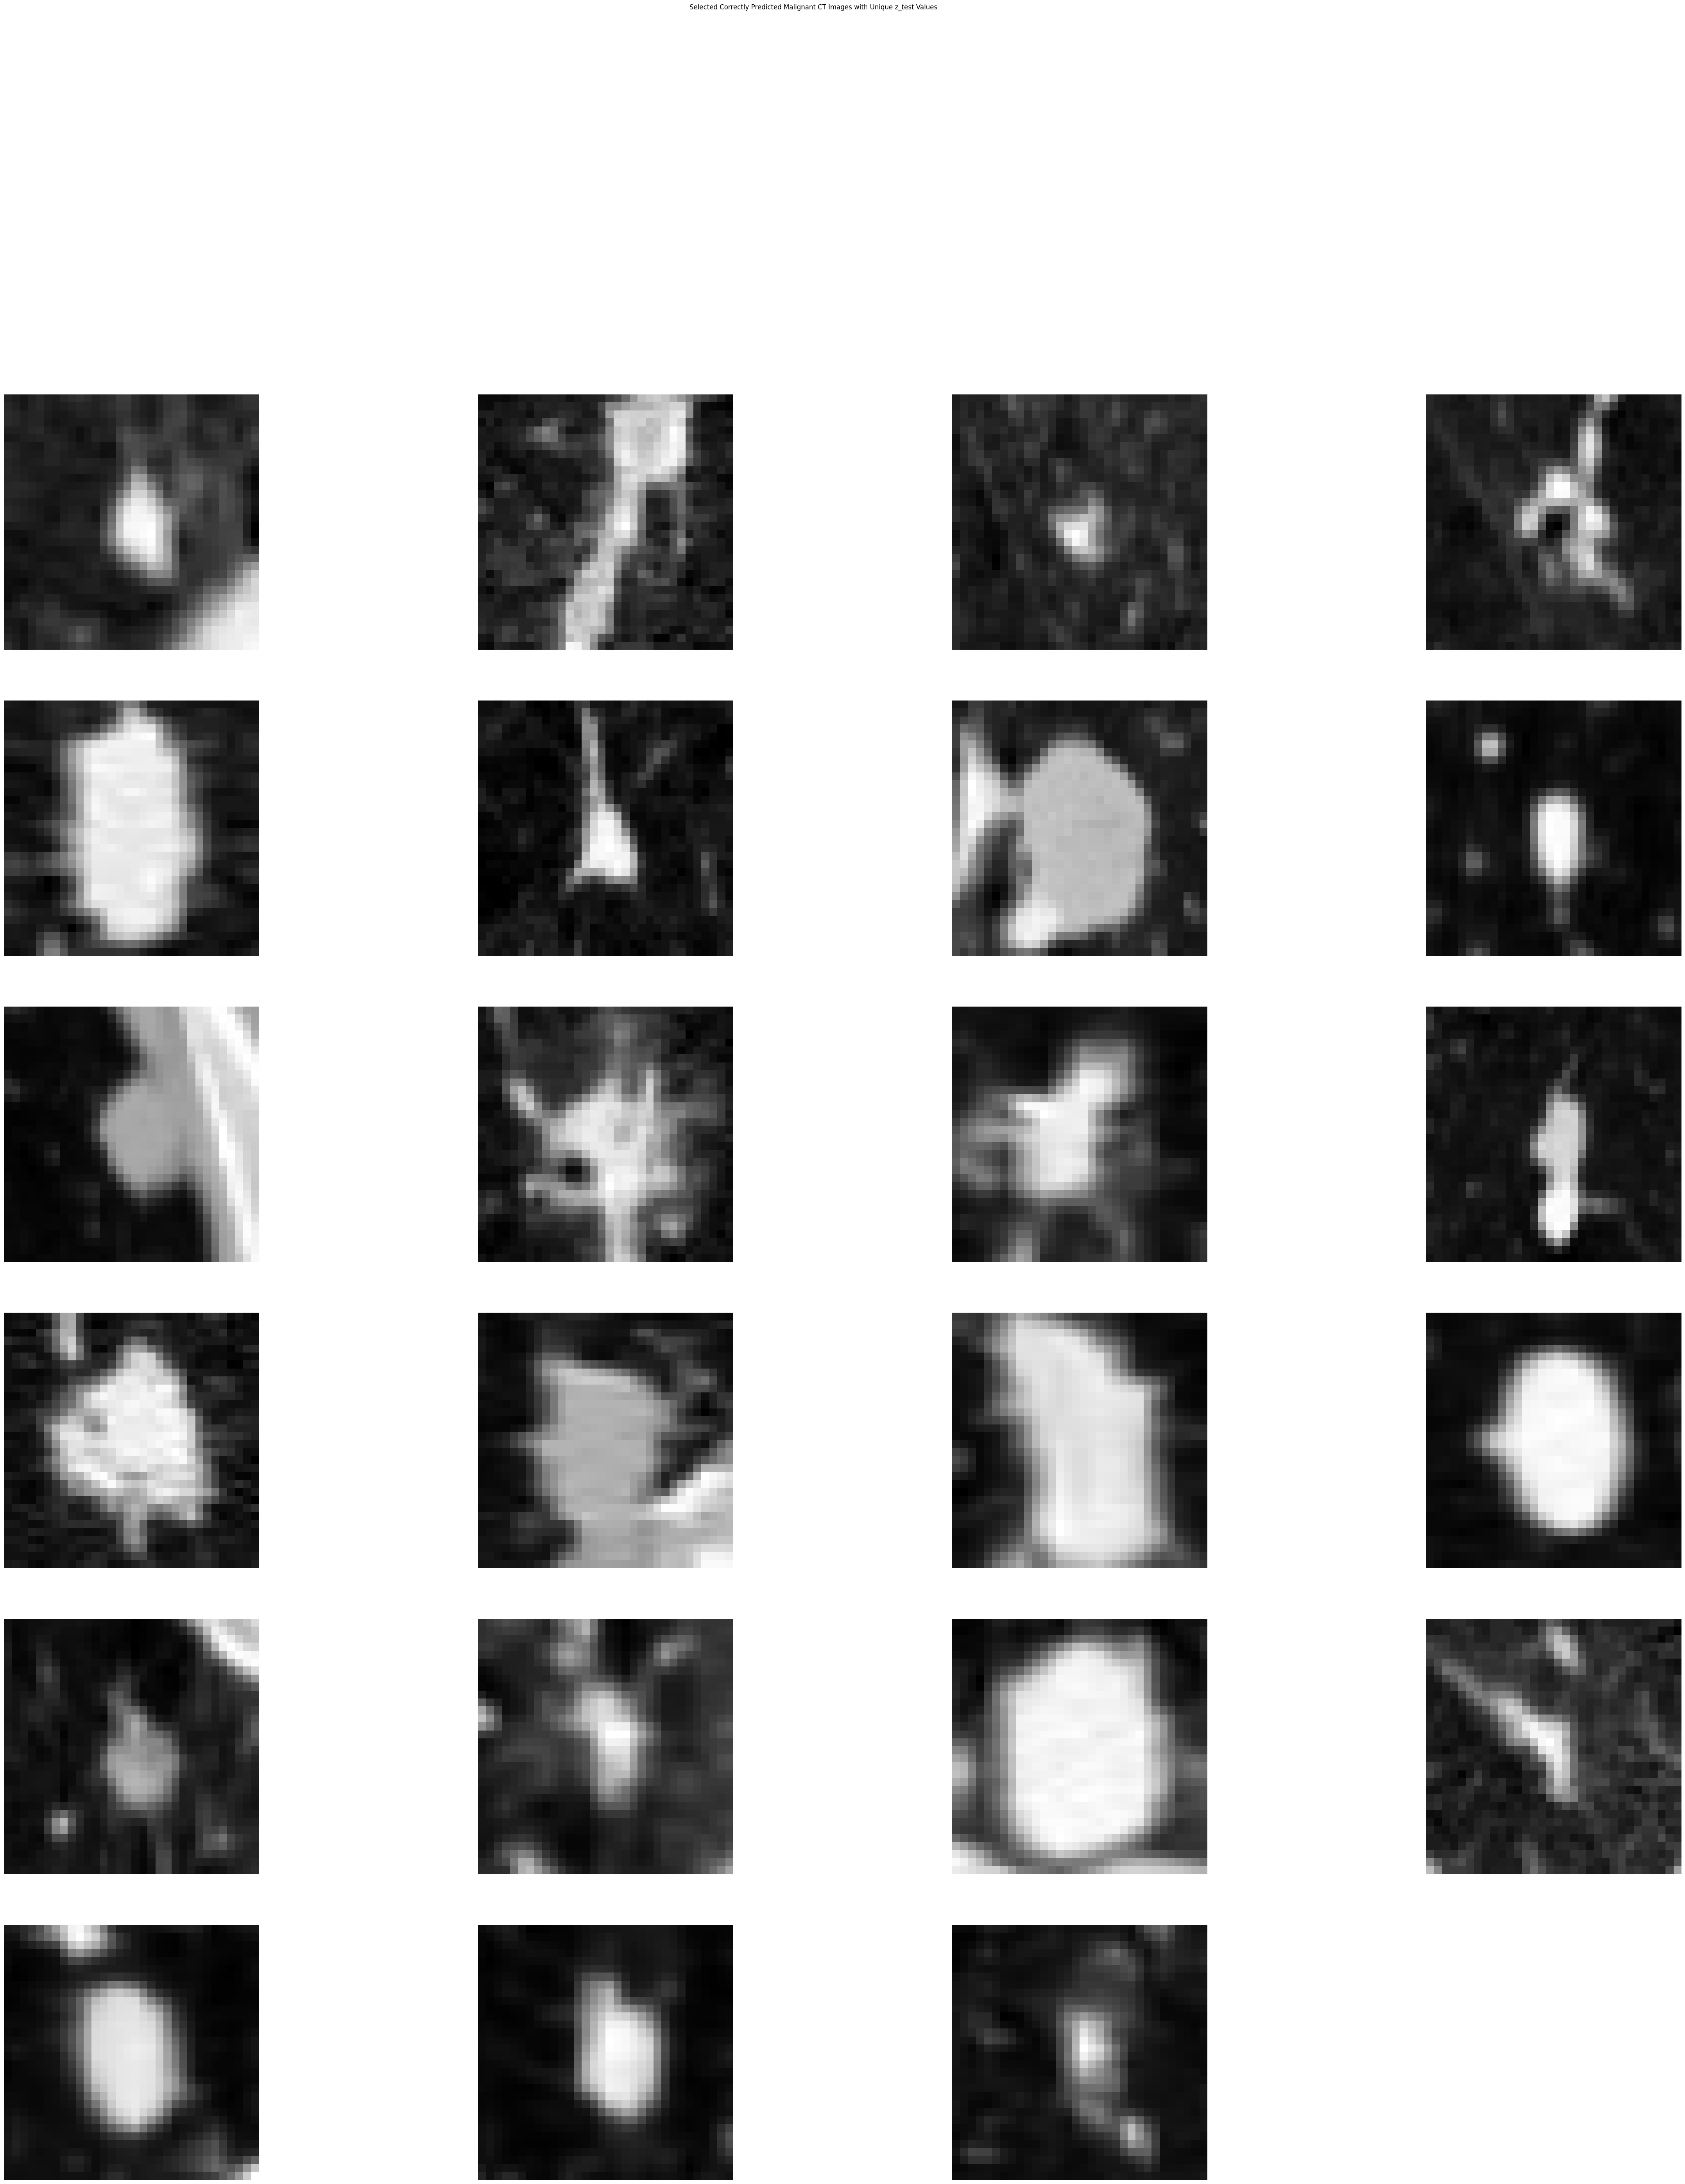

In [17]:
# Assuming correct_malignant_indices contains all the correct malignant predictions
correct_indices = np.where(predicted_classes == y_test)[0]
correct_malignant_indices = [i for i in correct_indices if y_test[i] == 1]

# Select indices based on the pattern 15, 15+32, 15+32+32, ...
selected_indices = []
unique_z_test_values = set()
for i in range(40):  # To get up to 40 plots
    index = 15 + i * 32
    if index < len(correct_malignant_indices):  # Ensure we don't go out of bounds
        z_value = z_test[correct_malignant_indices[index]]
        if z_value not in unique_z_test_values:  # Check if the z_test value is unique
            selected_indices.append(correct_malignant_indices[index])
            unique_z_test_values.add(z_value)

# Print the corresponding z_test values
print("Plotted unique z_test values:")
for idx in selected_indices:
    print(z_test[idx])

# Plotting the selected malignant CT images
plt.figure(figsize=(60, 100))
for i, idx in enumerate(selected_indices):
    plt.subplot(10, 4, i + 1)  # 10 rows and 5 columns for 50 plots
    plt.imshow(X_test[idx].reshape(32, 32, 32)[16], cmap='gray')  # Adjusted to slice 16
    plt.axis('off')

plt.suptitle('Selected Correctly Predicted Malignant CT Images with Unique z_test Values')
plt.show()
